In [2]:
import os
import sys
sys.path.append("./..")
from utils import PROJECT_ROOT
from definitions import get_cell_phenotype_id
import numpy as np
from SoftWL import compute_cluster_centroids, merge_close_clusters
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import pairwise_distances

In [66]:
iteration = 2
PhenoGraoh_k =  100

In [68]:
# Retrive cluster data
FILE_NAMES = os.listdir(
    os.path.join(PROJECT_ROOT, "Output", "b_Soft_WL_Kernel", "Danenberg", "Cohort_1")
)
X = []
Cluster_identities = []
for file_name in FILE_NAMES:
    x = np.load(
        os.path.join(
            PROJECT_ROOT,
            "Output",
            "b_Soft_WL_Kernel",
            "Danenberg",
            "Cohort_1",
            file_name,
            "X" + str(iteration) + ".npy",
        )
    )
    cluster_identities = np.load(
        os.path.join(
            PROJECT_ROOT,
            "Output",
            "b_Soft_WL_Kernel",
            "Danenberg",
            "Cohort_1",
            file_name,
            "initial_cluster_X"
            + str(iteration)
            + "_PhenoGraph_k_"
            + str(PhenoGraoh_k)
            + ".npy",
        )
    )
    X.append(x)
    Cluster_identities.append(cluster_identities)
X = np.concatenate(X, axis=0)
Cluster_identities = np.concatenate(Cluster_identities, axis=0)


### Signature map 

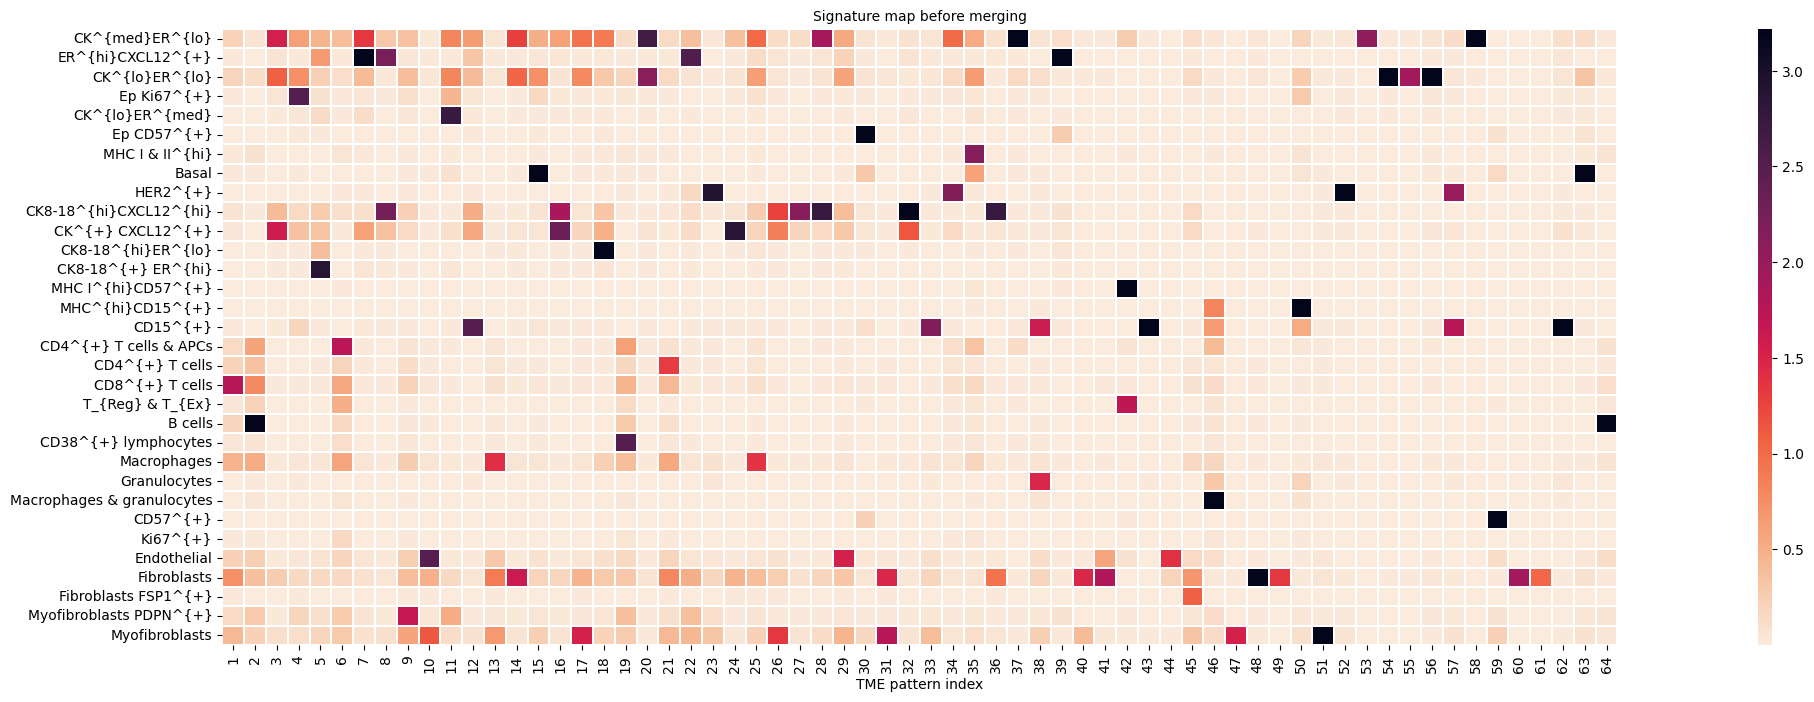

In [76]:
# Signature map before merging
Centroids = compute_cluster_centroids(X, Cluster_identities)
Signature = Centroids.T
Cell_type_name_list = list(get_cell_phenotype_id('Danenberg'))
f, (ax, cbar_ax) = plt.subplots(1,2,figsize=(20, 8),gridspec_kw= {"width_ratios": [20,0.2]} )
sns.heatmap(
        Signature,
        ax=ax,
        cbar_ax=cbar_ax,
        cmap="rocket_r",
        linewidth=0.005,
        edgecolor="black",
        vmax=np.percentile(Signature, 99),
        vmin=np.percentile(Signature, 1),
    )
ax.set_yticklabels(Cell_type_name_list, rotation=0, fontsize=10)
ax.set_xticklabels([i+1 for i in range(Signature.shape[1])], fontsize=10, rotation = 90)
ax.set_xlabel("TME pattern index", fontsize=10)
ax.set_title("Signature map before merging", fontsize=10)
plt.show()


### Umap

In [70]:
# Umap before merging
from sklearn.manifold import TSNE
import umap.umap_ as umap

n_sample = 100000
indices_sampled = np.random.choice(X.shape[0], n_sample, replace=False)
X_sampled = X[indices_sampled]
Cluster_identities_sampled = Cluster_identities[indices_sampled]
reducer = umap.UMAP()
embedding = reducer.fit_transform(X_sampled-np.mean(X_sampled, axis=0))


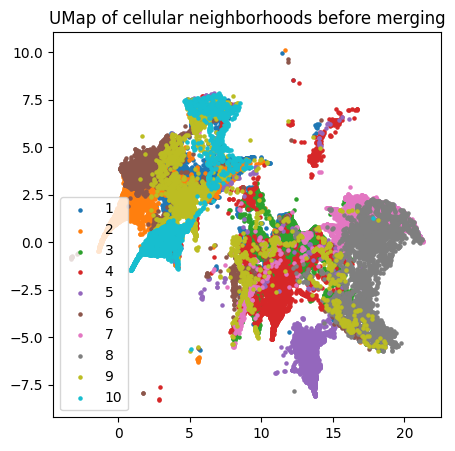

In [71]:
f, ax = plt.subplots(figsize = (5,5))
for i in range(10):
    ax.scatter(embedding[Cluster_identities_sampled == i,0], embedding[Cluster_identities_sampled == i,1], color = sns.color_palette('tab10')[i], s = 5, label = i+1)

ax.legend()
ax.set(title = 'UMap of cellular neighborhoods before merging')
f.show()

### Pairwose distance between centroids

Text(0.5, 1.0, 'Pairwise distance between centroids')

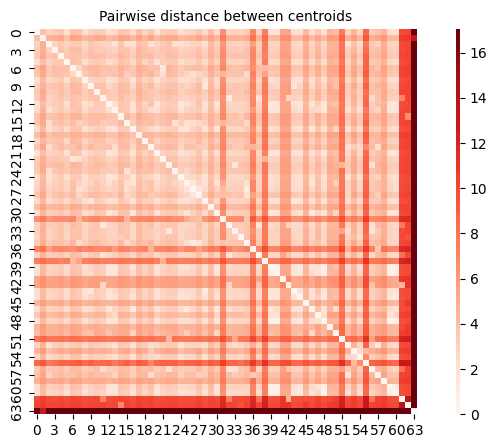

In [72]:
# Pirwise distance between centroids
pairwise_dist = pairwise_distances(Centroids)
f, (ax, cbar_ax) = plt.subplots(1,2,figsize=(5.5, 5),gridspec_kw= {"width_ratios": [20,0.2]} )
sns.heatmap(
        pairwise_dist,
        ax=ax,
        cbar_ax=cbar_ax,
        cmap="Reds",
        linewidth=0.0005,
        edgecolor="black",
        vmax=np.percentile(Centroids, 100),
        vmin=np.percentile(Centroids, 0),
    )
ax.set_title("Pairwise distance between centroids", fontsize=10)